In [2]:
%load_ext autoreload
%autoreload 2
import datasets
from glob import glob
TARGET_SIZE = (48, 48)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/mkk/anaconda3/envs/shelfwise_kk/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
train_images = glob("dataset/omniglot/python/images_background/*/*/*.png")
assert len(train_images) != 0, "No images. Unzip files."

In [3]:
validation_images = glob("dataset/omniglot/python/images_evaluation/*/*/*.png")
assert len(validation_images) != 0, "No images. Unzip files."

In [4]:
print(f'omniglot_training_{TARGET_SIZE[0]}_{TARGET_SIZE[1]}')

omniglot_training_48_48


In [6]:
dataset.build_dataset(
    train_images, 
    image_size=TARGET_SIZE,
    out_name=f'omniglot_training_{TARGET_SIZE[0]}_{TARGET_SIZE[1]}')

100%|██████████| 19280/19280 [00:25<00:00, 741.98it/s]


In [7]:
dataset.build_dataset(
    validation_images, 
    image_size=TARGET_SIZE,
    out_name=f'omniglot_validation_{TARGET_SIZE[0]}_{TARGET_SIZE[1]}')

100%|██████████| 13180/13180 [00:17<00:00, 745.55it/s]


# Test dataset

In [3]:
batch_size = 32

In [4]:
import plotting

In [5]:
import tensorflow as tf
tf.reset_default_graph()
sess = tf.InteractiveSession()

In [8]:
train_input_func, num_train_examples = datasets.get_input_function(
    "../data/omniglot_training_48_48.pkl", 
    batch_size, do_augmentation=True)
valid_input_func, num_valid_examples = datasets.get_input_function(
    "../data/omniglot_validation_48_48.pkl", 
    batch_size, do_augmentation=False)
training_generator = train_input_func()
validation_generator = valid_input_func()
num_train_examples, num_valid_examples

(19280, 13180)

In [9]:
%timeit  sess.run(training_generator)

The slowest run took 50.42 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 21.7 ms per loop


In [15]:
%timeit  sess.run(validation_generator)

100 loops, best of 3: 2.32 ms per loop


In [10]:
features, labels = sess.run(training_generator)

In [13]:
labels['label'].shape

(32, 30)

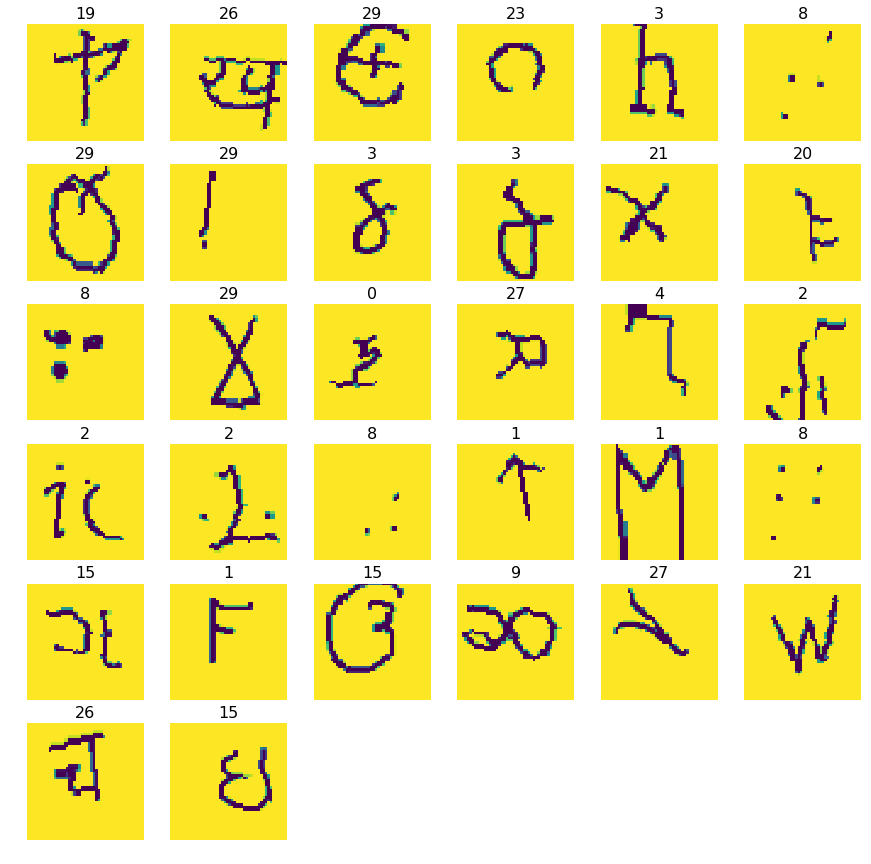

In [17]:
plotting.plots(features['image'][:, :, :, 0], rows=6, figsize=(15, 15), titles=labels['label'].argmax(-1))

In [18]:
features, labels = sess.run(validation_generator)

In [ ]:
plotting.plots(features['image'][:, :, :, 0], rows=6, figsize=(15, 15), titles=labels['label'].argmax(-1))

In [20]:
import pickle
dataset_path = "../data/omniglot_validation_48_48.pkl"
data = pickle.load(open(dataset_path, 'rb'))

In [22]:
data['label0'].shape

(13180, 20)